[[-0.01819632 -1.20210055]
 [ 0.01349114 -1.34991574]
 [-1.42277454  0.16206556]
 ...
 [-0.1346081  -1.04685309]
 [ 1.13083393  1.10728019]
 [ 1.13236417  1.26482463]]


Text(0.5, 1.0, 'Clusters based around the center values:')

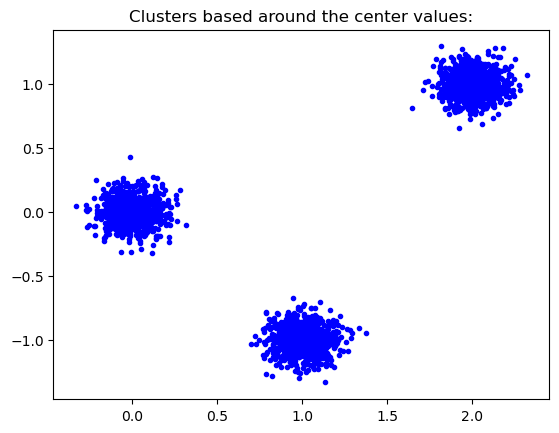

In [3]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
import numpy as np

centers = [[2,1],[0,0],[1,-1]]
data_2d, _ = make_blobs(n_samples=2500, centers=centers,cluster_std=0.1)

# Beregn gennemsnit og standardafvigelse for x og y koordinaterne i datapunkterne
mean = np.mean(data_2d, axis=0)
std_dev = np.std(data_2d, axis=0)

# Beregn z-score for hvert datapunkt i datasettet
z_score = (data_2d - mean) / std_dev
print(z_score)

plt.plot(data_2d[:,0], data_2d[:,1], 'b.')

plt.title('Clusters based around the center values:')

In [4]:
#Funktion til at lave et antal babyer
import random

def generate_babies(n_samples):
    babies = []
    for i in range(n_samples):
        height = random.uniform(40, 80) # højde i cm
        weight = random.uniform(2, 10) # vægt i kg
        age = random.randint(0, 24) # alder i måneder
        baby = (height, weight, age)
        babies.append(baby)
    return babies



#Vi laver 250 babyer
babies = generate_babies(250)



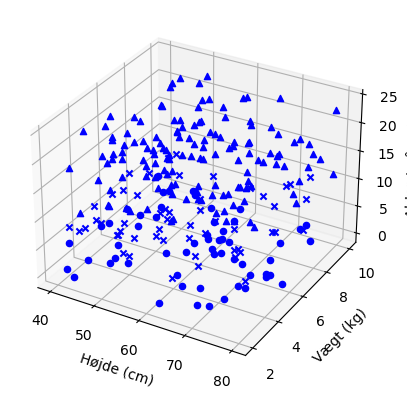

In [81]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def plot_babies_3d(babies):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for baby in babies:
        x = baby[0] # højde
        y = baby[1] # vægt
        z = baby[2] # alder
        # Vælg markør baseret på alder
        if z < 6:
            marker = 'o' # cirkel for spædbørn
        elif z < 12:
            marker = 'x' # kryds for småbørn
        else:
            marker = '^' # trekant for større børn
        ax.scatter(x, y, z, c='b', marker=marker)
    
    ax.set_xlabel('Højde (cm)')
    ax.set_ylabel('Vægt (kg)')
    ax.set_zlabel('Alder (måneder)')
    plt.show()



plot_babies_3d(babies)

In [73]:
def get_tallest(babies):
    tallest = max(babies, key=lambda x: x[0])
    return tallest

def get_shortest(babies):
    shortest = min(babies, key=lambda x: x[0])
    return shortest

def get_youngest(babies):
    youngest = min(babies, key=lambda x: x[2])
    return youngest

def get_oldest(babies):
    oldest = max(babies, key=lambda x: x[2])
    return oldest

def get_lightest(babies):
    lightest = min(babies, key=lambda x: x[1])
    return lightest

def get_heaviest(babies):
    heaviest = max(babies, key=lambda x: x[1])
    return heaviest

print('The tallest baby: ' + str(get_tallest(babies)))

The tallest baby: (79.94342289570454, 6.702540968976074, 14)


In [74]:
def generate_babies(n_samples):
    babies = []
    for i in range(n_samples):
        age = random.randint(0, 24) # alder i måneder
        # Beregn højde og vægt baseret på alder
        height = 40 + (age/24) * 40 # højde i cm
        weight = 2 + (age/24) * 8 # vægt i kg
        baby = (height, weight, age)
        babies.append(baby)
    return babies

babies = generate_babies(250)

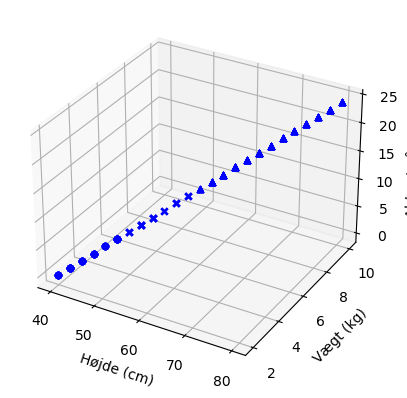

In [76]:
def plot_babies(babies):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for baby in babies:
        x = baby[0] # højde
        y = baby[1] # vægt
        z = baby[2] # alder
        # Vælg markør baseret på alder
        if z < 6:
            marker = 'o' # cirkel for spædbørn
        elif z < 12:
            marker = 'x' # kryds for småbørn
        else:
            marker = '^' # trekant for større børn
        ax.scatter(x, y, z, c='b', marker=marker)
    ax.set_xlabel('Højde (cm)')
    ax.set_ylabel('Vægt (kg)')
    ax.set_zlabel('Alder (måneder)')
    plt.show()

plot_babies(babies)

In [83]:
#Entry-wise product, Hadamard product
import numpy as np

m = np.array([[-2, 0, 1], [5, -4, 2], [7, -1, 3]])
q = np.array([[0, 7], [-3, 2], [1, 5]])

q_new = np.column_stack((q, np.zeros(q.shape[0])))
print(q_new)

result = m * q_new
print(result)

[[ 0.  7.  0.]
 [-3.  2.  0.]
 [ 1.  5.  0.]]
[[ -0.   0.   0.]
 [-15.  -8.   0.]
 [  7.  -5.   0.]]


In [125]:
#Netto Fakta opgave:
shoppers = {
    'Paula': {'Is': 4, 'Juice': 2, 'Kakao': 3, 'Lagkager': 2},
    'Peter': {'Is': 2, 'Juice': 5, 'Kakao': 0, 'Lagkager': 4},
    'Pandora': {'Is': 5, 'Juice': 3, 'Kakao': 4, 'Lagkager': 5},
    'Pietro': {'Is': 1, 'Juice': 8, 'Kakao': 9, 'Lagkager': 1}
}

shop_prices = {
    'Netto': {'Is': 10.50, 'Juice': 2.25, 'Kakao': 4.50, 'Lagkager': 33.50},
    'Fakta': {'Is': 4.00, 'Juice': 4.50, 'Kakao': 6.25, 'Lagkager': 20.00}
}

# Opret en dictionary til at holde styr på, hvor de billigste varer findes for hver person
cheapest_shops = {}

# Loop igennem hver person i shoppers-dictionary
for person, preferences in shoppers.items():
    
    # Beregn den samlede pris for hver person i hver butik
    netto_price = sum([shop_prices['Netto'][item] * quantity for item, quantity in preferences.items()])
    fakta_price = sum([shop_prices['Fakta'][item] * quantity for item, quantity in preferences.items()])
    
    print(netto_price, fakta_price)
    
    # Find den billigste butik for personen
    if netto_price < fakta_price:
        cheapest_shops[person] = 'Netto'
    elif netto_price > fakta_price:
        cheapest_shops[person] = 'Fakta'
    else:
        cheapest_shops[person] = 'Begge butikker'

# Print resultatet
for person, cheapest_shop in cheapest_shops.items():
    print(f"{person} kan finde de billigste varer hos {cheapest_shop}.")





127.0 83.75
166.25 110.5
244.75 158.5
102.5 116.25
Paula kan finde de billigste varer hos Fakta.
Peter kan finde de billigste varer hos Fakta.
Pandora kan finde de billigste varer hos Fakta.
Pietro kan finde de billigste varer hos Netto.


In [132]:
import pandas as pd

shoppers = {
    'Paula': {'Is': 4, 'Juice': 2, 'Kakao': 3, 'Lagkager': 2},
    'Peter': {'Is': 2, 'Juice': 5, 'Kakao': 0, 'Lagkager': 4},
    'Pandora': {'Is': 5, 'Juice': 3, 'Kakao': 4, 'Lagkager': 5},
    'Pietro': {'Is': 1, 'Juice': 8, 'Kakao': 9, 'Lagkager': 1}
}

shop_prices = {
    'Netto': {'Is': 10.50, 'Juice': 2.25, 'Kakao': 4.50, 'Lagkager': 33.50},
    'Fakta': {'Is': 4.00, 'Juice': 4.50, 'Kakao': 6.25, 'Lagkager': 20.00}
}


#Lav først to numpy arrays, derbruges transpose på shopper for at personerne bliver til rækker 
#i stedet for kolonner
mat_shopper = pd.DataFrame(shoppers).T.values
mat_prices = pd.DataFrame(shop_prices).values

#Få priserne for hver person i hver butik. Resultatet bliver gemt i variablen result
result = np.matmul(mat_shopper, mat_prices)

# Opret et pandas dataframe med result-matricen og personnavne som index
df = pd.DataFrame(result, index=shoppers.keys(), columns=['Netto', 'Fakta'])

# Print dataframe
print(df)



          Netto   Fakta
Paula    127.00   83.75
Peter    166.25  110.50
Pandora  244.75  158.50
Pietro   102.50  116.25


### nb08-3 01 Exercise
Use the CountVectorizer from sklearn.feature_extraction to read the book data/moby_dick.txt
How many times does the word 'wood' appear?

In [146]:
from sklearn.feature_extraction.text import CountVectorizer

with open('moby_dick.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Opret en instans af CountVectorizer med ordet 'wood' som eneste token
vectorizer = CountVectorizer(vocabulary=['wood'])

# Tæl antallet af forekomster af 'wood'
wood_count = vectorizer.fit_transform([text]).toarray()[0][0]

print(vectorizer.fit_transform([text]).toarray())
print(f"Antal forekomster af 'wood': {wood_count}")


[[37]]
Antal forekomster af 'wood': 37


#### Normalization skalerer dataene til en bestemt interval eller område, normalt mellem 0 og 1. Normalisering kan anvendes på data, der har forskellige minimums- og maksimumsværdier. Normalisering af data kan forbedre modellens ydeevne i nogle tilfælde.

#### Standardization transformerer dataene, så de har en gennemsnitlig værdi på 0 og en standardafvigelse på 1. Standardisering anvendes ofte på data, der har forskellige gennemsnit og standardafvigelser. Standardisering af data kan gøre det lettere at sammenligne data, der har forskellige enheder eller størrelser, og kan også forbedre modellens ydeevne.

### nb08-3 Exercise on sets
ℕ: Alle positive heltal <br>
ℤ: Alle positive og negative heltal <br>
ℚ: Alle tal, der kan skrives som en brøk <br>
ℝ: Alle tal, der kan skrives på decimalform,


4∈ℝ: True, tilhører også ℕ
 
𝜋∈ℚ: False, tilhører ℝ
 
23∈ℝ: True, tilhører alle kategorier
 
2⎯⎯√∉ℚ: True (da man ser om det ikke er ℚ), tilhøer kun ℝ
 
−5∈ℕ: False, tilhører ℤ
 
𝑙𝑜𝑔(7)∉ℚ: True (da man ser om det ikke er ℚ), tilhører kun ℝ

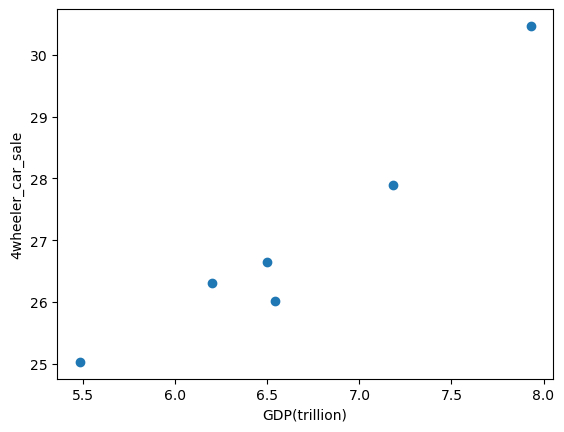

In [17]:
#nb08-04 Exercise linear regression
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('car_sales.csv', header=0)

plt.scatter(df['GDP(trillion)'], df['4wheeler_car_sale'])
plt.xlabel('GDP(trillion)')
plt.ylabel('4wheeler_car_sale')
plt.show()






In [26]:
#Fit data to a sklearn linear regression model
from sklearn.linear_model import LinearRegression


# Træn lineær regression model
#X er de en uafhægige variabel, (input)
X = df[['GDP(trillion)']]
#y er den afhængige variabel, (output)
y = df['4wheeler_car_sale']

#Modellen
model = LinearRegression()
model.fit(X, y)

#DataFrame-kolonnenavnet matche navnet 
#i det oprindelige DataFrame for at undgå fejlbeskeder.
new_GDP_df = pd.DataFrame({'GDP(trillion)': [9]})
#Det der skal forudsiges gøres med et DF med samme kolonnenavn
predicted_car_sale = model.predict(new_GDP_df)

print('Forventet 4wheeler bil salg for en GDP på 9 trillioner er', predicted_car_sale[0])

# Udskriv koefficienter for den lineære ligning
print('Koefficienten er', model.coef_[0])
print('Interceptet er', model.intercept_)



Forventet 4wheeler bil salg for en GDP på 9 trillioner er 32.22232152230351
Koefficienten er 2.1858806728172926
Interceptet er 12.549395466947876
